### SF Rent Analysis

#### Load data & firts look

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sf = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv')
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [ ]:
# sf.to_csv(r'C:\Users\a3011\OneDrive - Universidade da Coruña\Master en Tecnicas estadisticas\Notebooks\SF_Rent_Analisis\data\raw\rent.csv')

In [3]:
sf.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


In [4]:
sf['year'].sort_values(ascending=True).unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

se pararemos los anuncios que son de alquiler de habitaciones de lo que son de las unidades completas esto en miras de que no mezclemos informacion y la media, y otro estadisticos que queramos trabajar no se vean alterados artificialmente

#### Division del dataset

Ciudades a tomar:

- San Francisco

- Oakland

- Alameda

- Berkeley

Por que: 

- Mismo mercado regional

- Dinámicas distintas

- Muy buen contraste precio / crecimiento

#### Creacion Pipeline

In [5]:
sf['date'].head()

0    20050111
1    20050126
2    20041017
3    20120601
4    20041021
Name: date, dtype: int64

In [6]:
#### Pipeline del dataset

sf_copy = sf.copy()
sf_copy


,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200791,pre2013_126116,20040925,2004,yountville,yountville,napa,1850,2.0,NaN,NaN,0,NaN,NaN,NaN,$1850 / 2br - Yountville - LARGE townhouse in ...,NaN,NaN
200792,pre2013_162529,20060221,2006,yountville,yountville,napa,1950,2.0,NaN,NaN,0,NaN,NaN,NaN,$1950 / 2br - Yountville duplex,NaN,NaN
200793,pre2013_65092,20120402,2012,yountville,yountville,napa,2600,2.0,2.0,1300.0,0,NaN,NaN,NaN,$2600 / 2br - 1300ft² - Fully furnished two be...,NaN,NaN
200794,pre2013_57294,20120307,2012,yountville,yountville,napa,1900,2.0,NaN,1000.0,0,NaN,NaN,NaN,$1900 / 2br - 1000ft² - Charming Old Town Youn...,NaN,NaN


In [7]:
sf_copy['date'] = pd.to_datetime(sf_copy['date'], format='%Y%m%d', errors='coerce')
sf_copy['date'].notna().count()

np.int64(200796)

In [8]:
sf_copy.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,2005-01-11,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,2005-01-26,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,2004-10-17,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,2012-06-01,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,2004-10-21,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


In [9]:
def prepare_dates (df):
    if 'date' not in df.columns:
        raise ValueError('La Columna date no esta en el dataframe o la misma no de llama asi.')
    
    df_copy = df.copy()
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d', errors='coerce')
    df_copy= df_copy[df_copy['date'].notna()]

    return df_copy 

In [10]:
df_copy = prepare_dates(sf)
df_copy.post_id.count()

np.int64(200796)

In [11]:
def filter_units (df):
    if 'room_in_apt' not in df.columns:
        raise ValueError('La Columna room_in_apt no esta en el dataframe o la misma no de llama asi.')
    
    df_copy = df.copy()
    df_copy = df_copy[df_copy['room_in_apt'] == 0]

    return df_copy


In [12]:
df_copy_2 = filter_units(df_copy)
df_copy_2.post_id.count()

np.int64(200511)

In [13]:
def filter_cities (df):
    if 'city' not in df.columns:
        raise ValueError('La Columna city no esta en el dataframe o la misma no de llama asi.')
    
    df_copy = df.copy()
    #aqui hardcodeadas pero de ser necesario ponemos parametro ciudad entre los argumentos y dentro de isin pasamos este
    df_copy = df_copy[df_copy['city'].isin(['san francisco', 'oakland', 'alameda', 'berkeley'])]

    return df_copy

In [14]:
def filter_cities (df, ciudades):
    if 'city' not in df.columns:
        raise ValueError('La Columna city no esta en el dataframe o la misma no de llama asi.')
    
    if not isinstance(ciudades, (list,tuple)) or len(ciudades)<=0:
        raise ValueError('ciudades debe de ser una lista o tuple con los nombre de las ciudades')
    
    ciudades_listado = set(df['city'].unique())
    si_ciudades = [x for x in ciudades if x in ciudades_listado]

    if len(si_ciudades)==0:
        raise ValueError(f"Ninguna de las ciudades solicitadas existe en el DataFrame: {ciudades}")

    df_copy = df.copy()
    df_copy = df_copy[df_copy['city'].isin(si_ciudades)]

    return df_copy

In [15]:
df_copy_3 = filter_cities(df_copy_2, ['san francisco', 'oakland', 'alameda', 'berkeley','bayona'])
df_copy_3.post_id.count()

np.int64(70415)

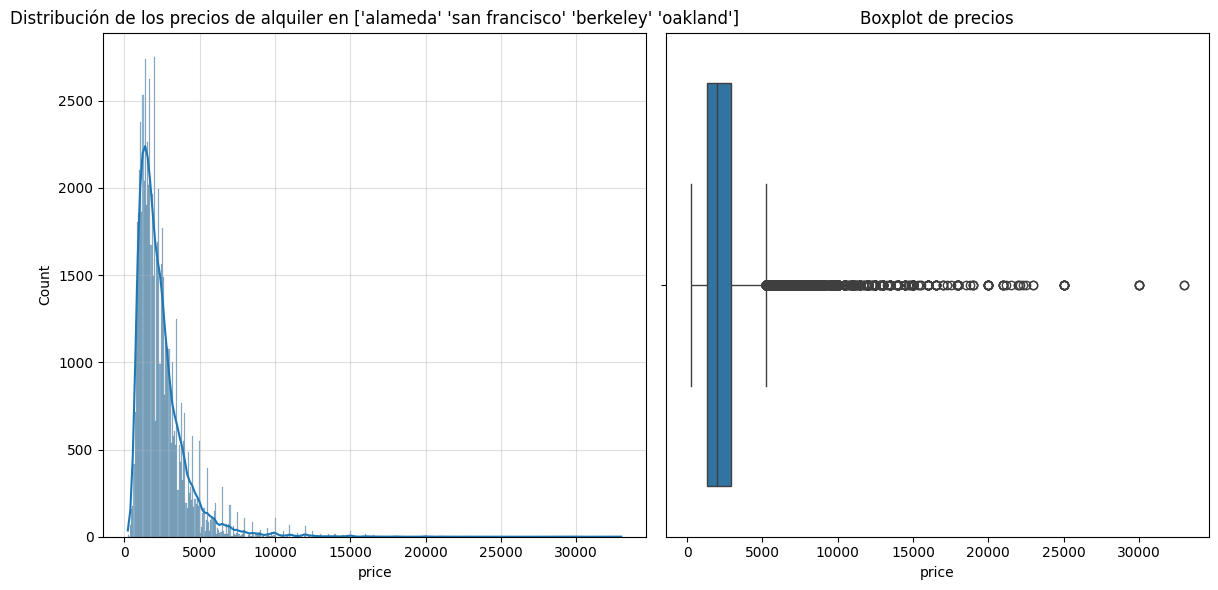

In [16]:
ciudades = df_copy_3.city.unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primera imagen - Histograma + KDE
sns.histplot(data=df_copy_3, x='price', kde=True, ax=axes[0])
axes[0].set_title(f'Distribución de los precios de alquiler en {ciudades}')
axes[0].grid(alpha=0.4)

# Segunda imagen - Boxplot
sns.boxplot(data=df_copy_3, x='price', ax=axes[1])
axes[1].set_title('Boxplot de precios')

plt.tight_layout()
plt.show()


In [17]:
cuartil_75 = df_copy_3.price.quantile(0.75)
cuartil_25 = df_copy_3.price.quantile(0.25)

iqr = cuartil_75-cuartil_25

upper = cuartil_75 + (1.5 * iqr)
lower = max(0,cuartil_25 - (1.5 * iqr))


In [18]:
pd.DataFrame({
    'cuartil_25': [cuartil_25],
    'cuartil_75': [cuartil_75],
    'iqr': [iqr],
    'upper': [upper],
    'lower': [lower]
})


,cuartil_25,cuartil_75,iqr,upper,lower
0,1350.0,2900.0,1550.0,5225.0,0


In [19]:

outliers_subtset = df_copy_3[(df_copy_3['price']>= lower) & (df_copy_3['price']<= upper)]
outliers_subtset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66748 entries, 0 to 199319
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   post_id      66748 non-null  object        
 1   date         66748 non-null  datetime64[ns]
 2   year         66748 non-null  int64         
 3   nhood        66748 non-null  object        
 4   city         66748 non-null  object        
 5   county       66748 non-null  object        
 6   price        66748 non-null  int64         
 7   beds         64262 non-null  float64       
 8   baths        12458 non-null  float64       
 9   sqft         11682 non-null  float64       
 10  room_in_apt  66748 non-null  int64         
 11  address      1217 non-null   object        
 12  lat          2661 non-null   float64       
 13  lon          1336 non-null   float64       
 14  title        66294 non-null  object        
 15  descr        855 non-null    object        
 16  details 

In [20]:
def clean_prices(df, p_low=0.01, p_high=0.99):
    if 'price' not in df.columns:
        raise ValueError("La columna 'price' no existe en el DataFrame")

    if not (0 < p_low < p_high < 1):
        raise ValueError("p_low y p_high deben cumplir 0 < p_low < p_high < 1")

    df_copy = df.copy()

    lower = df_copy['price'].quantile(p_low)
    upper = df_copy['price'].quantile(p_high)

    df_copy = df_copy[
        (df_copy['price'] >= lower) &
        (df_copy['price'] <= upper)
    ]

    return df_copy
    

In [21]:
clean_prices(df_copy_3)

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,2005-01-11,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,2005-01-26,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,2004-10-17,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,2012-06-01,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,2004-10-21,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199315,6449175780,2018-01-11,2018,western addition,san francisco,san francisco,2200,NaN,NaN,NaN,0,NaN,NaN,NaN,$2250 Great Remod Cath Hill elev lndry***OPEN ...,NaN,NaN
199316,pre2013_55364,2012-02-28,2012,western addition,san francisco,san francisco,3350,2.0,2.0,1400.0,0,NaN,NaN,NaN,$3350 / 2br - 1400ft² - Great 2bd/2ba Loft Sty...,NaN,NaN
199317,4208121131,2013-12-22,2013,western addition,san francisco,san francisco,1875,NaN,NaN,NaN,0,NaN,37.78206,NaN,Dec 22 $1875 Top Flr PANO VW Cath Hill Clos L...,NaN,"<p class=""row"" data-latitude=""37.782057"" data-..."
199318,pre2013_39043,2011-11-28,2011,western addition,san francisco,san francisco,1750,1.0,NaN,NaN,0,NaN,NaN,NaN,"$1750 / 1br - Hardwood Flrs, Heart of Jazz Dis...",NaN,NaN


In [22]:
def orquestador(df, ciudad, p_low=0.01, p_high=0.99):
    if df.empty:
        raise ValueError('El dataframe a venido vacio')
    
    df_copy=df.copy()

    df_fechas = prepare_dates(df_copy)

    df_units= filter_units(df_fechas)

    df_cities = filter_cities(df_units,ciudades=ciudad)

    df_prices = clean_prices(df_cities,p_low=p_low, p_high=p_high)

    return df_prices

In [23]:
orquestador(sf,['san francisco', 'oakland', 'alameda', 'berkeley'])

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,2005-01-11,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,2005-01-26,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,2004-10-17,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,2012-06-01,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,2004-10-21,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199315,6449175780,2018-01-11,2018,western addition,san francisco,san francisco,2200,NaN,NaN,NaN,0,NaN,NaN,NaN,$2250 Great Remod Cath Hill elev lndry***OPEN ...,NaN,NaN
199316,pre2013_55364,2012-02-28,2012,western addition,san francisco,san francisco,3350,2.0,2.0,1400.0,0,NaN,NaN,NaN,$3350 / 2br - 1400ft² - Great 2bd/2ba Loft Sty...,NaN,NaN
199317,4208121131,2013-12-22,2013,western addition,san francisco,san francisco,1875,NaN,NaN,NaN,0,NaN,37.78206,NaN,Dec 22 $1875 Top Flr PANO VW Cath Hill Clos L...,NaN,"<p class=""row"" data-latitude=""37.782057"" data-..."
199318,pre2013_39043,2011-11-28,2011,western addition,san francisco,san francisco,1750,1.0,NaN,NaN,0,NaN,NaN,NaN,"$1750 / 1br - Hardwood Flrs, Heart of Jazz Dis...",NaN,NaN


#### Analisis de tiempo
Evolución del alquiler mediano por ciudad. 

 (solo unidades completas)

##### ¿Cómo ha evolucionado el alquiler mediano por ciudad a lo largo del tiempo?

In [24]:
sf_unidades_completa = orquestador(sf,['san francisco', 'oakland', 'alameda', 'berkeley'])

In [25]:
sf_unidades_completa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69074 entries, 0 to 199319
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   post_id      69074 non-null  object        
 1   date         69074 non-null  datetime64[ns]
 2   year         69074 non-null  int64         
 3   nhood        69074 non-null  object        
 4   city         69074 non-null  object        
 5   county       69074 non-null  object        
 6   price        69074 non-null  int64         
 7   beds         66684 non-null  float64       
 8   baths        13458 non-null  float64       
 9   sqft         12883 non-null  float64       
 10  room_in_apt  69074 non-null  int64         
 11  address      1359 non-null   object        
 12  lat          2944 non-null   float64       
 13  lon          1495 non-null   float64       
 14  title        68558 non-null  object        
 15  descr        976 non-null    object        
 16  details 

In [26]:
resumen_mediana_ciudades = sf_unidades_completa.groupby(by=['year','city'])['price'].median().reset_index()
resumen_mediana_ciudades.columns=['year','City','median_price']
resumen_mediana_ciudades.head()

,year,City,median_price
0,2000,oakland,1150.0
1,2000,san francisco,1822.5
2,2001,alameda,1700.0
3,2001,berkeley,1260.0
4,2001,oakland,1200.0


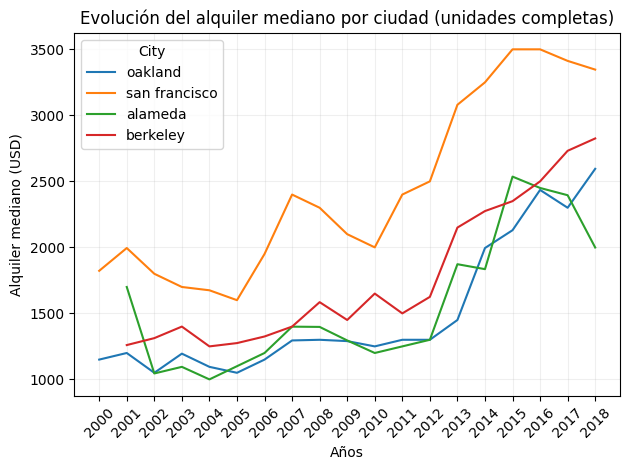

In [27]:
sns.lineplot(data=resumen_mediana_ciudades, x='year', y='median_price', hue='City')
plt.grid(alpha=0.2)
plt.title('Evolución del alquiler mediano por ciudad (unidades completas)')
plt.ylabel('Alquiler mediano (USD)')
plt.xlabel('Años')
plt.xticks(np.arange(2000,resumen_mediana_ciudades['year'].max()+1, 1 ), rotation = 45 )
plt.tight_layout()

El alquiler mediano muestra una tendencia creciente en todas las ciudades analizadas, con San Francisco manteniéndose como el mercado más caro y volátil. Oakland y Alameda presentan trayectorias similares, mientras que Berkeley ocupa una posición intermedia. Se observan rupturas claras alrededor de 2005 y 2008, coherentes con ciclos inmobiliarios conocidos.

#### Brecha entre ciudades

##### ¿Qué tan grande es la brecha de alquiler entre ciudades y cómo evoluciona en el tiempo?

In [28]:
pivot_resumen_ciudades = resumen_mediana_ciudades.pivot(columns='City',index='year',values='median_price').reset_index()
pivot_resumen_ciudades.columns= ['year',	'alameda'	,'berkeley',	'oakland'	,'san francisco'] 
# pivot_resumen_ciudades.columns = ['year'] + [c.lower() for c in pivot_resumen_ciudades.columns[1:]]
# forma de renombrar de manra mas agil evitando error humano

pivot_resumen_ciudades.head()

,year,alameda,berkeley,oakland,san francisco
0,2000,NaN,NaN,1150.0,1822.5
1,2001,1700.0,1260.0,1200.0,1995.0
2,2002,1045.0,1312.5,1050.0,1800.0
3,2003,1095.0,1400.0,1195.0,1700.0
4,2004,1000.0,1250.0,1095.0,1675.0


In [29]:
comparativa = ['alameda','berkeley','oakland']

for i in comparativa:
    pivot_resumen_ciudades[f"{i}_diff"] = pivot_resumen_ciudades['san francisco']-pivot_resumen_ciudades[i]

In [30]:
for i in comparativa:
    pivot_resumen_ciudades[f"{i}_pct"] =((pivot_resumen_ciudades['san francisco']/pivot_resumen_ciudades[i])-1)*100

In [31]:
pivot_resumen_ciudades.round(2).head()

,year,alameda,berkeley,oakland,san francisco,alameda_diff,berkeley_diff,oakland_diff,alameda_pct,berkeley_pct,oakland_pct
0,2000,NaN,NaN,1150.0,1822.5,NaN,NaN,672.5,NaN,NaN,58.48
1,2001,1700.0,1260.0,1200.0,1995.0,295.0,735.0,795.0,17.35,58.33,66.25
2,2002,1045.0,1312.5,1050.0,1800.0,755.0,487.5,750.0,72.25,37.14,71.43
3,2003,1095.0,1400.0,1195.0,1700.0,605.0,300.0,505.0,55.25,21.43,42.26
4,2004,1000.0,1250.0,1095.0,1675.0,675.0,425.0,580.0,67.50,34.00,52.97


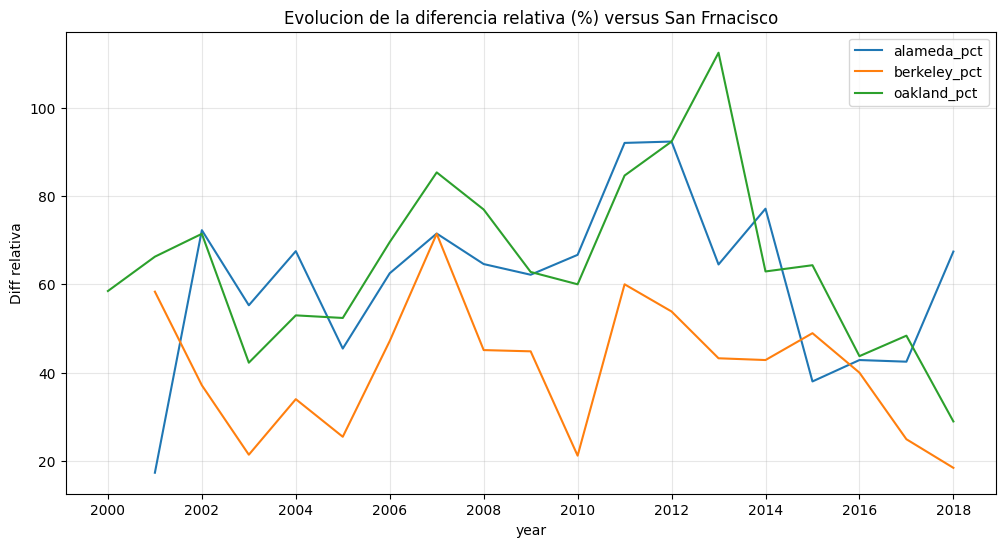

In [32]:
plt.figure(figsize=(12,6))

plt.plot(pivot_resumen_ciudades['year'],
         pivot_resumen_ciudades['alameda_pct'],
         label='alameda_pct')

plt.plot(pivot_resumen_ciudades['year'],
         pivot_resumen_ciudades['berkeley_pct'],
         label = 'berkeley_pct')

plt.plot(pivot_resumen_ciudades['year'],
         pivot_resumen_ciudades['oakland_pct'],
         label='oakland_pct')

plt.title('Evolucion de la diferencia relativa (%) versus San Frnacisco')
plt.ylabel('Diff relativa')
plt.xlabel('year')
plt.xticks(np.arange(pivot_resumen_ciudades['year'].min(),pivot_resumen_ciudades['year'].max()+1,2))
plt.grid(alpha= 0.3)
plt.legend()

La brecha de alquiler entre San Francisco y el resto de ciudades muestra una jerarquía estable en el tiempo. Berkeley se mantiene consistentemente como la ciudad más cercana en precios, seguida por Alameda y luego Oakland. Se observa una convergencia relativa alrededor de 2018, cuando la brecha con Berkeley alcanza su mínimo (~19%), aunque San Francisco continúa siendo el mercado más caro del área.

#### Unidades por habitaciones

Diferencia de Precio
- ¿Cuánto más barato es alquilar una habitación frente a una unidad completa, por ciudad y año?

Comportamiento en crisis
- ¿En crisis aumenta la diferencia entre habitaciones y unidades completas?

Como hipotesis relativa partimos de que las habitaciones funciona como un producto refugio.

osea en crisis:

- su precio cae menos
- o incluso sube relativamente

In [33]:
# prepare_dates()
# filter_cities()
# clean_prices()

In [34]:
# Generar la variable producto
room_in_apt = {0:'unit', 1:'room'}
sf_copy['product'] = sf_copy['room_in_apt'].map(room_in_apt)

In [35]:
sf_copy['product'] = ['unit' if x == 0  else 'room' for x in sf_copy['room_in_apt']]

In [36]:
# crear columna producto

def product(df):
    if 'room_in_apt' not in df.columns:
        raise ValueError(' La Columna room_in_apt no esta en el dataset')
    
    df_copy = df.copy()
    df_copy['product'] = ['unit' if x == 0 else 'room' for x in df_copy['room_in_apt']]

    return df_copy

In [37]:
def orquestador_unit_room (df, cities, p_low = 0.01, p_high=0.99):
    if df.empty:
        raise ValueError('El dataset es vacio')
    
    df_copy = df.copy()

    df_fechas = prepare_dates(df_copy)
    df_ciudad = filter_cities(df_fechas, cities)
    df_prices = clean_prices(df_ciudad, p_low=p_low, p_high=p_high)
    df_product = product(df_prices)

    return df_product

In [38]:
unit_room = orquestador_unit_room(sf,['alameda'	,'berkeley',	'oakland'	,'san francisco'])
unit_room.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69220 entries, 0 to 199319
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   post_id      69220 non-null  object        
 1   date         69220 non-null  datetime64[ns]
 2   year         69220 non-null  int64         
 3   nhood        69220 non-null  object        
 4   city         69220 non-null  object        
 5   county       69220 non-null  object        
 6   price        69220 non-null  int64         
 7   beds         66826 non-null  float64       
 8   baths        13509 non-null  float64       
 9   sqft         12930 non-null  float64       
 10  room_in_apt  69220 non-null  int64         
 11  address      1392 non-null   object        
 12  lat          2989 non-null   float64       
 13  lon          1534 non-null   float64       
 14  title        68698 non-null  object        
 15  descr        1009 non-null   object        
 16  details 

In [39]:
resumen_unit_room = unit_room.groupby(by= ['year','city','product'])['price'].median().reset_index()

In [40]:
# pivot table
pivot_unit_room = resumen_unit_room.pivot(columns='product', index=['year','city'], values='price').reset_index()
pivot_unit_room


product,year,city,room,unit
0,2000,oakland,NaN,1150.0
1,2000,san francisco,NaN,1822.5
2,2001,alameda,NaN,1700.0
3,2001,berkeley,NaN,1260.0
4,2001,oakland,NaN,1200.0
...,...,...,...,...
69,2017,san francisco,1895.0,3412.5
70,2018,alameda,NaN,1999.0
71,2018,berkeley,2350.0,2825.0
72,2018,oakland,NaN,2595.0


In [41]:
pivot_unit_room['diff_usd'] = pivot_unit_room.unit - pivot_unit_room.room
pivot_unit_room['diff_pct'] = (pivot_unit_room.unit / pivot_unit_room.room - 1 ) *100
pivot_unit_room_copy = pivot_unit_room[pivot_unit_room['diff_usd'].notna()].copy()
pivot_unit_room_copy.head()

product,year,city,room,unit,diff_usd,diff_pct
5,2001,san francisco,700.0,1995.0,1295.0,185.000000
13,2003,san francisco,3395.0,1700.0,-1695.0,-49.926362
14,2004,alameda,725.0,1000.0,275.0,37.931034
15,2004,berkeley,700.0,1250.0,550.0,78.571429
16,2004,oakland,1200.0,1095.0,-105.0,-8.750000


In [42]:
median_diff_pct = pivot_unit_room_copy.groupby(by='year').agg({'diff_usd':'median', 'diff_pct':'median'}).reset_index()
median_diff_pct

product,year,diff_usd,diff_pct
0,2001,1295.00,185.000000
1,2003,-1695.00,-49.926362
2,2004,412.50,57.123412
3,2005,83.25,7.852860
4,2006,335.00,33.838384
5,2007,-595.00,-19.866444
6,2011,-765.50,-27.524774
7,2012,40.00,2.523659
8,2013,705.00,64.300626
9,2014,1450.00,80.555556


Durante periodos de crisis, la brecha de precio entre unidades completas y habitaciones se reduce significativamente e incluso se invierte en términos medianos. Esto sugiere que las habitaciones funcionan como un producto refugio, absorbiendo parte de la presión de demanda cuando el mercado inmobiliario entra en estrés.

En términos medianos, las habitaciones se encarecen RELATIVAMENTE más que las unidades completas.

No es solo “unit baja”.

Es:
- presión sobre el mercado de rooms
- aumento de demanda por producto refugio
- desplazamiento de consumidores

Con todavia un 2011 que sugiere:
- resaca estructural.
- mercado todavía ajustándose


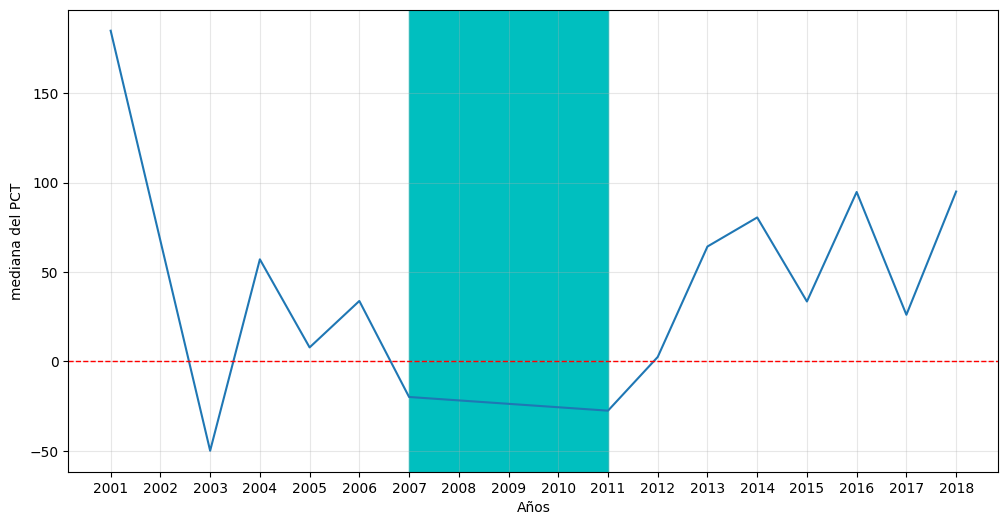

In [43]:
plt.figure(figsize=(12,6))

plt.plot(median_diff_pct['year'], median_diff_pct['diff_pct'])
plt.xticks(np.arange(median_diff_pct['year'].min(),median_diff_pct['year'].max()+1,1))
plt.ylabel('mediana del PCT')
plt.xlabel('Años')
plt.axhline(y=0, color='red', linestyle = '--', linewidth = 1)
plt.axvspan(2007,2011, color='c')
plt.grid(alpha=0.3)


El análisis comparativo entre habitaciones y unidades completas muestra que, en periodos de crisis, la brecha de precios se reduce significativamente e incluso se invierte. Esto sugiere que las habitaciones funcionan como un producto refugio, absorbiendo la presión de demanda cuando el mercado inmobiliario entra en estrés. El fenómeno se observa antes, durante y después de la crisis de 2008, y se normaliza gradualmente en los años posteriores.

#### Estructura Del Mercado

##### ¿Qué proporción del mercado de alquiler corresponde a habitaciones vs unidades completas y cómo ha cambiado en el tiempo?

In [94]:
Conteo = unit_room.groupby(by=['year','city','product'])['post_id'].count().reset_index()
Conteo.rename(columns={'post_id':'n_listings'}, inplace=True)
Conteo

,year,city,product,n_listings
0,2000,oakland,unit,3
1,2000,san francisco,unit,10
2,2001,alameda,unit,5
3,2001,berkeley,unit,20
4,2001,oakland,unit,44
...,...,...,...,...
99,2018,berkeley,room,1
100,2018,berkeley,unit,150
101,2018,oakland,unit,246
102,2018,san francisco,room,7


In [ ]:
# Forma rapida y eficiente
Conteo['Total_city_year'] = (
    Conteo
    .groupby(by=['year','city'])['n_listings']
    .transform('sum'))

Conteo['pct'] =  (Conteo['n_listings'] / Conteo['Total_city_year'] ) * 100

,year,city,product,n_listings,Total_city_year
0,2000,oakland,unit,3,3
1,2000,san francisco,unit,10,10
2,2001,alameda,unit,5,5
3,2001,berkeley,unit,20,20
4,2001,oakland,unit,44,44
...,...,...,...,...,...
99,2018,berkeley,room,1,151
100,2018,berkeley,unit,150,151
101,2018,oakland,unit,246,246
102,2018,san francisco,room,7,759


In [ ]:
# # Forma con el merge 
# Conteo = unit_room.groupby(by=['year','city','product'])['post_id'].count().reset_index()
# conteo_year_city = Conteo.groupby(by=['year','city'])['post_id'].sum().reset_index()

# Conteo.loc[:,['year','city','post_id']].merge(conteo_year_city['post_id'], on=['year','city'])

In [113]:
Conteo

,year,city,product,n_listings,Total_city_year,pct
0,2000,oakland,unit,3,3,100.000000
1,2000,san francisco,unit,10,10,100.000000
2,2001,alameda,unit,5,5,100.000000
3,2001,berkeley,unit,20,20,100.000000
4,2001,oakland,unit,44,44,100.000000
...,...,...,...,...,...,...
99,2018,berkeley,room,1,151,0.662252
100,2018,berkeley,unit,150,151,99.337748
101,2018,oakland,unit,246,246,100.000000
102,2018,san francisco,room,7,759,0.922266


La participación de habitaciones en el mercado de anuncios es históricamente baja, pero muestra incrementos relativos en periodos de estrés económico, especialmente antes y después de la crisis de 2008.

Entonces...

Aunque la proporción de anuncios de habitaciones sigue siendo reducida, su comportamiento en precios sugiere que funcionan como un mecanismo de ajuste del mercado, absorbiendo presión de demanda incluso sin un aumento masivo en volumen.

Finalizamos con que la proporción de anuncios de habitaciones es reducida a lo largo de todo el periodo analizado. Sin embargo, se observan aumentos relativos en años cercanos a la crisis financiera, lo que sugiere un uso más intensivo de este tipo de alojamiento como mecanismo de ajuste. La ausencia de anuncios en algunos años debe interpretarse como una limitación del dataset y no como ausencia real del mercado.

In [ ]:
Conteo_room = Conteo[Conteo['product']=='room']
Conteo_room_pct = Conteo_room.groupby(by=['year'])['pct'].median().reset_index()

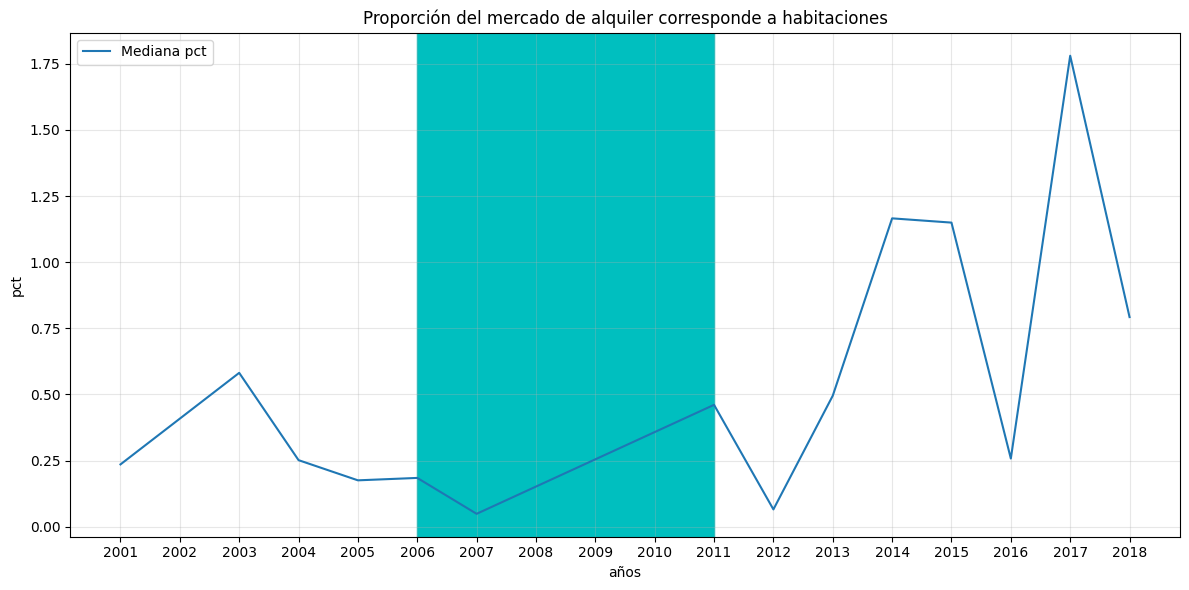

In [137]:
plt.figure(figsize=(12,6))

plt.plot(Conteo_room_pct['year'],Conteo_room_pct['pct'], label='Mediana pct')
plt.xticks(np.arange(Conteo_room_pct['year'].min(),Conteo_room_pct['year'].max()+1,1))
plt.axvspan(2006,2011, color='c')
plt.ylabel('pct')
plt.xlabel('años')
plt.legend() 
plt.title('Proporción del mercado de alquiler corresponde a habitaciones')
plt.grid(alpha=0.3)
plt.tight_layout()

Aunque la proporción de habitaciones dentro del mercado de alquiler se mantiene relativamente baja, se observan variaciones significativas a lo largo del tiempo. Estas variaciones coinciden con periodos de estrés económico y con fases de fuerte presión inmobiliaria, lo que sugiere que las habitaciones cumplen un rol de ajuste estructural más que de sustitución masiva.